In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../../data/credit-a.csv', header=None)
print(data.head())

   0      1      2   3   4   5   6     7   8   9   10  11  12   13     14  15
0   0  30.83  0.000   0   0   9   0  1.25   0   0   1   1   0  202    0.0  -1
1   1  58.67  4.460   0   0   8   1  3.04   0   0   6   1   0   43  560.0  -1
2   1  24.50  0.500   0   0   8   1  1.50   0   1   0   1   0  280  824.0  -1
3   0  27.83  1.540   0   0   9   0  3.75   0   0   5   0   0  100    3.0  -1
4   0  20.17  5.625   0   0   9   0  1.71   0   1   0   1   2  120    0.0  -1


In [3]:
a = data.iloc[:, -1].value_counts()
print(a)

 1    357
-1    296
Name: 15, dtype: int64


In [4]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
              )

In [7]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
21/21 [==============================] - 2s 3ms/step - loss: 19.8382 - acc: 0.6662
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 17.2218 - acc: 0.6708
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 14.9479 - acc: 0.6723
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 12.3035 - acc: 0.6753
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 9.7362 - acc: 0.6708
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 6.9985 - acc: 0.6753
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 4.0563 - acc: 0.6815
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 1.3728 - acc: 0.6524
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 1.0626 - acc: 0.6432
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.8607 - acc: 0.6417
Epoch 11/100
21/21 [==============================] - 0

21/21 [==============================] - 0s 2ms/step - loss: 0.5588 - acc: 0.7412
Epoch 88/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5559 - acc: 0.7381
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 2.0853 - acc: 0.6937
Epoch 90/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6051 - acc: 0.6891
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8575 - acc: 0.7044
Epoch 92/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5704 - acc: 0.7228
Epoch 93/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5251 - acc: 0.7351
Epoch 94/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5242 - acc: 0.7381
Epoch 95/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5223 - acc: 0.7366
Epoch 96/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5239 - acc: 0.7412
Epoch 97/100
21/21 [==============================] - 0s 2ms/st

In [8]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


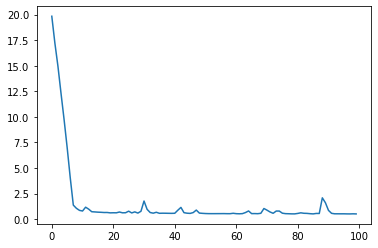

In [9]:
plt.plot(history.epoch, history.history.get('loss'))
plt.show()

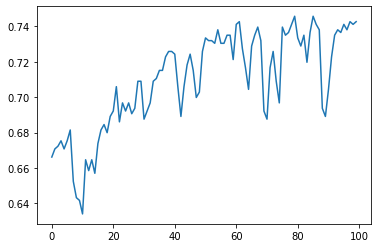

In [10]:
plt.plot(history.epoch, history.history.get('acc'))
plt.show()